# Topics

## 1. Sound in Python -- Continued

## Sound is no more or less than a numpy array

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import os
from scipy.io.wavfile import write
from IPython.lib.display import Audio


In [24]:
'''Play a tone at 880 Hz '''
freq = 440.*2
sample_rate = 44100
duration = 3
time_pts = np.linspace(0, duration, duration*sample_rate)
amp = 2**4
tone = amp*np.sin(np.pi*2*freq*time_pts)
# tone_data = np.uint8(tone_data)

write('tone.wav', sample_rate, tone)
# os.system("afplay tone.wav") 


Audio(tone, rate = sample_rate)

In [7]:
'''Play the A tone at twice the sampling rate '''
freq = 440.
sample_rate = 44100
duration = 3
time_pts = np.linspace(0, duration, duration*sample_rate)
amp = 2**4
tone_data = amp*np.sin(np.pi*2*freq*time_pts)

write('tone2.wav', sample_rate*2, tone_data)

# os.system("afplay Atone.wav") 
# # note it's only half as long
# # it's the same as playing a recorder at a speed
# # twice as fast as it should have been played.
# os.system("afplay tone2.wav") 
# # Do scientific python note A and sample rate

In [8]:
Audio(tone_data, rate = sample_rate)

In [9]:
Audio(tone_data, rate = 2*sample_rate)

In [10]:
'''Play the A tone at 440 Hz and another at 880 Hz '''
freq = 440.
sample_rate = 44100.
duration = 2
time_pts = np.linspace(0, duration, duration*sample_rate)

Atone_data = np.sin(np.pi*2*freq*time_pts)
Atone_dbl = np.sin(np.pi*2*freq*2*time_pts)
#Atone_tpl = amp*np.sin(np.pi*3*freq*2*time_pts)

amp1 = 2**5
amp2 = 2**3

sound_data2 = amp1*Atone_data + amp2*Atone_dbl 
Audio(sound_data2, rate = sample_rate)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


## Quick Breakout: Add another component that has 3x the frequency, and try setting the amplitude for this component to be 4.

In [11]:
amp3 = 2**2
Atone_tpl = amp3*np.sin(np.pi*3*freq*2*time_pts)

Audio(tone_data*4, rate = 3*sample_rate)

## The harmonics gives a tone its unique quality (or "timbre")

### "In simple terms, timbre is what makes a particular musical sound different from another, even when they have the same pitch and loudness. For instance, it is the difference between a guitar and a piano playing the same note at the same volume."  (Wikipedia)

### You now possess the ability to produce any sound of any timbre at your fingertips!

rate: 48000
uint8 (142208,)


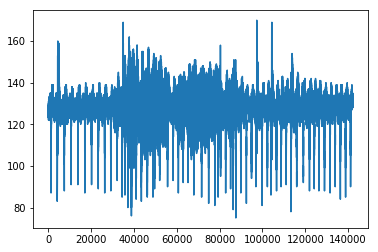

In [13]:
from scipy.io.wavfile import read

# For mac users, this is another option
# import subprocess as sub
# sub.call(['afplay', 'tone.wav'])


rate, dolph_snd = read("tuimelaar.wav")
print('rate:', rate)
print(dolph_snd.dtype, dolph_snd.shape)
plt.plot(dolph_snd)
plt.show()

48000


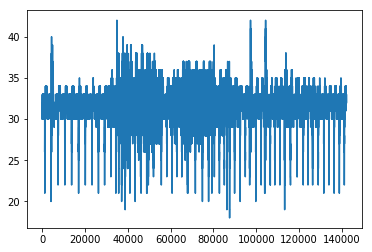

In [14]:
# same dolphins at twice the distance
far_dolph = dolph_snd//4
print(rate)
plt.plot(far_dolph)
write('far_dolph.wav', rate, far_dolph)
# need to do things this way. 
# Audio seems to have readjusted the sound level
os.system("afplay tuimelaar.wav") 
os.system("afplay far_dolph.wav") 
plt.show()


In [15]:
Audio(dolph_snd, rate = sample_rate)

In [3]:
Audio(far_dolph, rate = sample_rate)

NameError: name 'far_dolph' is not defined

In [17]:
'''Now changing the rate'''
import numpy as np
from scipy.io.wavfile import write
lo_rate = rate//8
write('lo_pitch_dolph.wav', lo_rate, dolph_snd)
# os.system("afplay tuimelaar.wav") 
# os.system("afplay lo_pitch_dolph.wav") 

In [18]:
Audio(dolph_snd, rate = lo_rate)

## Breakout:
## Write a function that takes a numpy array, and a play rate, creates a temp wav file, plays the sound, then removes (rm) the temp file.  Call it playsound().


In [22]:
def playsound(lo_rate, dolph_snd):
    
    write('temp.wav', lo_rate, dolph_snd)
    
    os.system("afplay temp.wav")
    
    os.system("rm temp.wav")

In [25]:
playsound(44100, tone)

In [23]:
lo_rate = rate//2
playsound(lo_rate, dolph_snd)

## End of week 7-3